In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# import data
Data = pd.read_csv("/Users/l-meilin/WISER CLUB/Final/data.csv", encoding = 'utf-8', sep = ',')
Holiday = pd.read_csv("/Users/l-meilin/WISER CLUB/Final/holiday.csv", encoding = 'utf-8', sep = ',')
Data = Data.drop(columns =Data.columns[1])
mergetable = pd.merge(Data,Holiday,on='dt',how="left")

In [3]:
# Part 1: Explorative Data Analysis

In [4]:
# 1.time span of the order data
print (Data['dt'].min() + ' to '  + Data['dt'].max())

2019-01-20 to 2019-03-01


In [5]:
# 2.number of orders each day
Data.groupby('dt')['dt'].agg(len)

dt
2019-01-20     69859
2019-01-21    117686
2019-01-22    118409
2019-01-23    126331
2019-01-24    125764
2019-01-25    122092
2019-01-26     77779
2019-01-27     66399
2019-01-28    106025
2019-01-29    104704
2019-01-30    101047
2019-01-31     97701
2019-02-01     87458
2019-02-02     64267
2019-02-03     43106
2019-02-04      7113
2019-02-05      8516
2019-02-06      7769
2019-02-07      7655
2019-02-08      7822
2019-02-09      8452
2019-02-10      8241
2019-02-11     40365
2019-02-12     43334
2019-02-13     50789
2019-02-14     49092
2019-02-15     49836
2019-02-16     29672
2019-02-17     25179
2019-02-18     52260
2019-02-19     51624
2019-02-20     53121
2019-02-21     51817
2019-02-22     53685
2019-02-23     31964
2019-02-24     27414
2019-02-25     53969
2019-02-26     50018
2019-02-27     48970
2019-02-28     51272
2019-03-01     53279
Name: dt, dtype: int64

In [6]:
# 2-a
mergetable.groupby('weekday')['dt'].agg(len)

weekday
1    377418
2    376605
3    388027
4    383301
5    374172
6    212134
7    240198
Name: dt, dtype: int64

In [7]:
# From the result above, we can see that there are more sales on weekdays than on weekends, so it's better to design two different strategies

In [8]:
# 3.number of users
len(Data['member_id'].value_counts(dropna=False))

466886

In [9]:
# 4. top 10 commodity
a = Data.groupby('commodity_name').count().sort_values(by='dt',ascending=False)
b = a['dt'].head(10)
b

commodity_name
拿铁       425514
榛果拿铁     219627
澳瑞白      155506
标准美式     148666
香草拿铁     136841
卡布奇诺     115475
摩卡       113754
加浓美式     110526
焦糖玛奇朵    105081
焦糖拿铁      81120
Name: dt, dtype: int64

In [10]:
# 4-a. Draw the graph
order_num = np.array(a['dt'])[:10]
top_names = np.array(b.index)

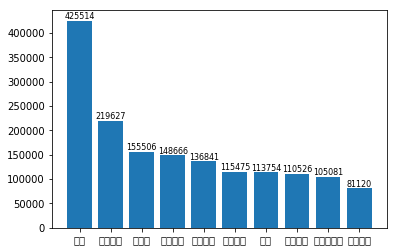

In [11]:
#import matplotlib
#matplotlib.rcParams['font.sans-serif'] = ['SimHei']
#matplotlib.rcParams['font.family']='sans-serif'
x=np.arange(10)
plt.figure
plt.bar(x,height=order_num,tick_label=top_names)
for a, b in zip(x, order_num):
    plt.text(a, b + 0.05, '%.0f' % b, ha='center', va='bottom', fontsize=8)
plt.show()

In [12]:
# 5.discount rate 
Data.eval('discount_rate = commodity_income/commodity_origin_money' , inplace=True)
Data

,Unnamed: 0,dt,phone_no,member_id,commodity_code,commodity_name,commodity_origin_money,coupon_id,coupon_money,one_category_name,two_category_name,commodity_income,pay_money,coffeestore_share_money,discount_rate
0,0,2019-01-25,13901387938,14442,SP025,榛果拿铁,27.0,7045.0,19.44,饮品,现磨咖啡,7.56,7.56,0.0,0.28
1,1,2019-01-27,13901387938,14442,SP209,NFC鲜榨橙汁,24.0,NaN,0.00,饮品,鲜榨果蔬汁,0.00,0.00,0.0,0.00
2,2,2019-01-23,13901387938,14442,SP025,榛果拿铁,27.0,5589.0,22.14,饮品,现磨咖啡,4.86,4.86,0.0,0.18
3,3,2019-02-01,13901387938,14442,SP025,榛果拿铁,27.0,6604.0,19.44,饮品,现磨咖啡,7.56,7.56,0.0,0.28
4,4,2019-01-27,13901387938,14442,SP010,巧克力瑞纳冰,27.0,6947.0,14.04,饮品,瑞纳冰,12.96,12.96,0.0,0.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351850,2351850,2019-02-14,13622881441,97654670,SP079,意大利烤鸡卷(单卷),13.0,NaN,0.00,食品,健康轻食,8.58,8.58,0.0,0.66
2351851,2351851,2019-02-14,13622881441,97654670,SP008,拿铁,24.0,5676.0,12.00,饮品,现磨咖啡,12.00,12.00,0.0,0.50
2351852,2351852,2019-02-13,13622881441,97654670,SP016,焦糖玛奇朵,27.0,8592.0,13.50,饮品,现磨咖啡,13.50,13.50,0.0,0.50
2351853,2351853,2019-02-12,13622881441,97654670,SP008,拿铁,24.0,8585.0,12.00,饮品,现磨咖啡,12.00,12.00,0.0,0.50


In [13]:
# 6. Average discount
mergetable = pd.merge(Data,Holiday,on='dt',how="left")
mergetable = mergetable.sort_values(by='dt')
a = mergetable.groupby('dt')['discount_rate','weekday'].mean()
a = pd.DataFrame(a)

In [14]:
b=[]
average_discount=[]
for i in range(0,len(a.index),7):
    k = 0
    while k < 7 and i+k <len(a.index):
        b.append(a.values[i+k][0])
        k += 1
    average_discount.append(np.mean(b))
    b = []
average_discount

[0.3962648009875321,
 0.41604955393824977,
 0.37657338723366485,
 0.4715258131853095,
 0.48945381219040723,
 0.48809928302983163]

In [15]:
# 7. Retention rate on 2019-01-20 to 2019-01-24
k = Data.groupby('dt')['member_id'].unique()
#2019-01-20
x = pd.DataFrame(k.loc['2019-01-20']).isin (k.loc['2019-01-21'])
print('2019-1-20:', sum(np.array(x[0])!= 0)/len(x))
#2019-01-21
x = pd.DataFrame(k.loc['2019-01-21']).isin (k.loc['2019-01-22'])
print('2019-1-21:', sum(np.array(x[0])!= 0)/len(x))
#2019-01-22
x = pd.DataFrame(k.loc['2019-01-22']).isin (k.loc['2019-01-23'])
print('2019-1-22:', sum(np.array(x[0])!= 0)/len(x))
#2019-01-23
x = pd.DataFrame(k.loc['2019-01-23']).isin (k.loc['2019-01-24'])
print('2019-1-23:', sum(np.array(x[0])!= 0)/len(x))
#2019-01-24
x = pd.DataFrame(k.loc['2019-01-24']).isin (k.loc['2019-01-25'])
print('2019-1-24:', sum(np.array(x[0])!= 0)/len(x))

2019-1-20: 0.15231850117096019
2019-1-21: 0.24634949291137898
2019-1-22: 0.23529411764705882
2019-1-23: 0.22776001023410516
2019-1-24: 0.22098283129433535


In [16]:
# 8. Week retention rate on 2019-01-20
x = pd.DataFrame(k.loc['2019-01-20']).isin (list(k.loc['2019-01-21'])+list(k.loc['2019-01-22'])+list(k.loc['2019-01-23'])+list(k.loc['2019-01-24'])+list(k.loc['2019-01-25'])+list(k.loc['2019-01-26'])+list(k.loc['2019-01-27']))
print('week retention rate on 2019-01-21:',sum(np.array(x[0])!= 0)/len(x))

week retention rate on 2019-01-21: 0.5108196721311475


In [17]:
# 9. Week retention rate for new users on 2019-01-28
new_user = []
l = list(k.loc[:'2019-01-27'])
m = [j for i in l for j in i]   #m is a list of member id before 2019-01-28
x = pd.DataFrame(k.loc['2019-01-28'])
x['old_user'] = x.isin(m)
for i in range(0,len(x)):
    if x['old_user'][i] == 0:
        new_user.append(x[0][i])
y = pd.DataFrame(new_user).isin (list(k.loc['2019-01-29'])+list(k.loc['2019-01-30'])+list(k.loc['2019-01-31'])+list(k.loc['2019-02-01'])+list(k.loc['2019-02-02'])+list(k.loc['2019-02-03'])+list(k.loc['2019-02-04']))
print('week retention rate for new user on 2019-01-28:',sum(np.array(y[0])!= 0)/len(new_user))

week retention rate for new user on 2019-01-28: 0.2886271529888551


In [18]:
# 10. Retention Rate WITHIN one week of new users
# I choose the second week. From 2019-1-28 to 2019-02-03 

# users in this week
users = list(Data.groupby('dt')['member_id'].unique().loc['2019-01-28':'2019-02-03'])
# make every memeber_id in one single list
users1 = [j for i in users for j in i] 
x = pd.DataFrame(users1)

# new_user2 is a list of newusers during this week
new_user = []
x['old_user'] = x.isin(m)
for i in range(0,len(x)):
    if x['old_user'][i] == 0:
        new_user.append(x[0][i])
# To obtain a list which a user only appears once
new_user_unique = list(set(new_user))

In [19]:
# Find how many newisers buy more than once during this week
f=0
from collections import Counter
d = dict(Counter(new_user))
value_list = list(d.values())
for i in value_list:
    if i > 1:
        f+=1
print('Retention Rate WITHIN this week of new users',f/len(new_user_unique))


Retention Rate WITHIN this week of new users 0.16769036738571405


In [20]:
# 11. Active users
a = Data.groupby('member_id')['dt'].agg(len)
a = pd.DataFrame(a)
a.rename(columns={'dt':'number_of_orders'}, inplace = True)
print(a.loc[a['number_of_orders'] >= 5])

           number_of_orders
member_id                  
1525                      7
1533                     12
1557                     50
1574                     24
1575                    139
...                     ...
97945667                  8
97946290                  6
97946934                  7
97950455                  6
97952548                 10

[166308 rows x 1 columns]


In [21]:
# 12. ActiveUser.csv
b = a.loc[a['number_of_orders'] >= 5]
b.to_csv(path_or_buf="ActiveUser.csv", sep=',', header=True, index=True)

In [22]:
# 13. A description of the number of orders for each active users
print('Number of Activeusers:',len(b))
print('range of orders:',b.min()[0],'to',b.max()[0])
print('average of orders:',b.mean()[0])
print(b.describe())

Number of Activeusers: 166308
range of orders: 5 to 585
average of orders: 10.418187940447844
       number_of_orders
count     166308.000000
mean          10.418188
std            7.599244
min            5.000000
25%            6.000000
50%            8.000000
75%           12.000000
max          585.000000


In [23]:
# 13-a. std,variance,skewness,kurtosis
print('std:',b.std()[0])
print('variace:',b.var()[0])
print('skewness:',b.skew()[0])
print('kurtosis:',b.kurt()[0])

std: 7.599244204561086
variace: 57.74851248055525
skewness: 6.542468770976487
kurtosis: 241.3579866155422


In [24]:
# Part 2: Data Preprocessing

In [25]:
# 1. Remove the first column
Data = Data.drop(columns =Data.columns[0])
Data

,dt,phone_no,member_id,commodity_code,commodity_name,commodity_origin_money,coupon_id,coupon_money,one_category_name,two_category_name,commodity_income,pay_money,coffeestore_share_money,discount_rate
0,2019-01-25,13901387938,14442,SP025,榛果拿铁,27.0,7045.0,19.44,饮品,现磨咖啡,7.56,7.56,0.0,0.28
1,2019-01-27,13901387938,14442,SP209,NFC鲜榨橙汁,24.0,NaN,0.00,饮品,鲜榨果蔬汁,0.00,0.00,0.0,0.00
2,2019-01-23,13901387938,14442,SP025,榛果拿铁,27.0,5589.0,22.14,饮品,现磨咖啡,4.86,4.86,0.0,0.18
3,2019-02-01,13901387938,14442,SP025,榛果拿铁,27.0,6604.0,19.44,饮品,现磨咖啡,7.56,7.56,0.0,0.28
4,2019-01-27,13901387938,14442,SP010,巧克力瑞纳冰,27.0,6947.0,14.04,饮品,瑞纳冰,12.96,12.96,0.0,0.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351850,2019-02-14,13622881441,97654670,SP079,意大利烤鸡卷(单卷),13.0,NaN,0.00,食品,健康轻食,8.58,8.58,0.0,0.66
2351851,2019-02-14,13622881441,97654670,SP008,拿铁,24.0,5676.0,12.00,饮品,现磨咖啡,12.00,12.00,0.0,0.50
2351852,2019-02-13,13622881441,97654670,SP016,焦糖玛奇朵,27.0,8592.0,13.50,饮品,现磨咖啡,13.50,13.50,0.0,0.50
2351853,2019-02-12,13622881441,97654670,SP008,拿铁,24.0,8585.0,12.00,饮品,现磨咖啡,12.00,12.00,0.0,0.50


In [26]:
# 2. User-item pair
Data1=Data
Data1['Quantity'] = 1
User_item = pd.pivot_table(Data1,index='phone_no', columns = 'commodity_name', values = 'Quantity', aggfunc = np.sum, fill_value = 0)
print(User_item)

commodity_name  NFC鲜榨橙汁  NFC鲜榨芒果汁  NFC鲜榨芒果混合果汁  NFC鲜榨荔枝汁  NFC鲜榨蓝莓草莓混合果汁  \
phone_no                                                                  
51379898              0         0            0         0              0   
57047978              0         0            0         0              0   
61120518              0         0            0         0              0   
62288158              0         0            0         0              1   
64618166              0         0            0         0              0   
...                 ...       ...          ...       ...            ...   
19997912482           0         0            0         0              0   
19999208056           0         0            0         0              0   
19999597999           0         0            0         0              0   
33757911877           0         0            0         0              0   
85293820835           0         0            0         0              0   

commodity_name  依云矿泉水330

In [27]:
# 3. A dataset of purchasing trend
len(Data.groupby('dt'))
# Because the number of days in time span is not an even number, so we drop the first day.
ind = Data1['dt'] != pd.DataFrame(Data.groupby('dt'))[0][0]
Data2 = Data1.loc[ind,]
trend = pd.pivot_table(Data2,index='phone_no', columns = 'dt', values = 'Quantity', aggfunc = np.sum, fill_value = 0)

In [28]:
A = pd.DataFrame()
for i in range(0,len(trend.columns)//2):
    A.insert(i,i+1,np.array(trend.iloc[:,2*i] + trend.iloc[:,2*i+1]))
A

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,1,0,0,1
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454491,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
454492,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
454493,0,5,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,3
454494,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [29]:
# Part 3: Model Training and Prediction

In [30]:
# 1. Transform the data into an array
newdata = np.array(A)
newdata

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 5, 0, ..., 0, 0, 3],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]], dtype=int64)

In [31]:
# 2. Split the data
X, Y = newdata[:,0:19], newdata[:,19]
print(X,Y)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 5 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]] [0 1 0 ... 3 0 0]


In [33]:
# 3. Construct the model for prediction
X = pd.DataFrame(X)
Y = pd.DataFrame(Y)

In [40]:
# Adaboost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

AdaBoost_clf = AdaBoostClassifier(n_estimators=10)  
AdaBoost_clf.fit(X_train,Y_train)
Y_pred = AdaBoost_clf.predict(X_test)
print('Train score:{:.3f}'.format(AdaBoost_clf.score(X_train, Y_train)))
print('Test score:{:.3f}'.format(AdaBoost_clf.score(X_test, Y_test)))
scores = cross_val_score(AdaBoost_clf,X_train,Y_train,cv = 3) 
print('MSE',scores)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train score:0.873
Test score:0.880


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for

MSE [0.87336773 0.87350747 0.87358483]


In [36]:
# Random Forest
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print('Accuracy:', acc_random_forest)
print('Train score:{:.3f}'.format(random_forest.score(X_train, Y_train)))
print('Test score:{:.3f}'.format(random_forest.score(X_test, Y_test)))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Accuracy: 95.1
Train score:0.951
Test score:0.875
